# IST687 – Visualization:  air quality Analysis


In [1]:
# install.packages("ggplot2")
library(ggplot2)
# install.packages("reshape2")
library(reshape2)

Step 1: Load the data

We will use the airquality data set, which you should already have as part of your R installation.


In [2]:
# Assign the built-in "airquality" dataset into a new variable called "air"
 air <- data.frame(airquality)

Step 2: Clean the data

After you load the data, there will be some NAs in the data. You need to figure out what to do about those nasty NAs.


In [4]:
 # find which columns in the dataframe contain NAs.
 colnames(air)[colSums(is.na(air)) > 0]

character(0)

In [5]:
 # Check if the NAs in column "Ozone" and replace them by the mean value of this column
 air$Ozone[is.na(air$Ozone)] <- mean(air$Ozone, na.rm=TRUE)
 # Check if the NAs in column "Solar.R" and replace those NAs by the mean value of this column
 air$Solar.R[is.na(air$Solar.R)] <- mean(air$Solar.R, na.rm=TRUE)

Step 3: Understand the data distribution

Create the following visualizations using ggplot:

•	Histograms for each of the variables  

•	Boxplot for Ozone

•	Boxplot for wind values (round the wind to get a good number of “buckets”)


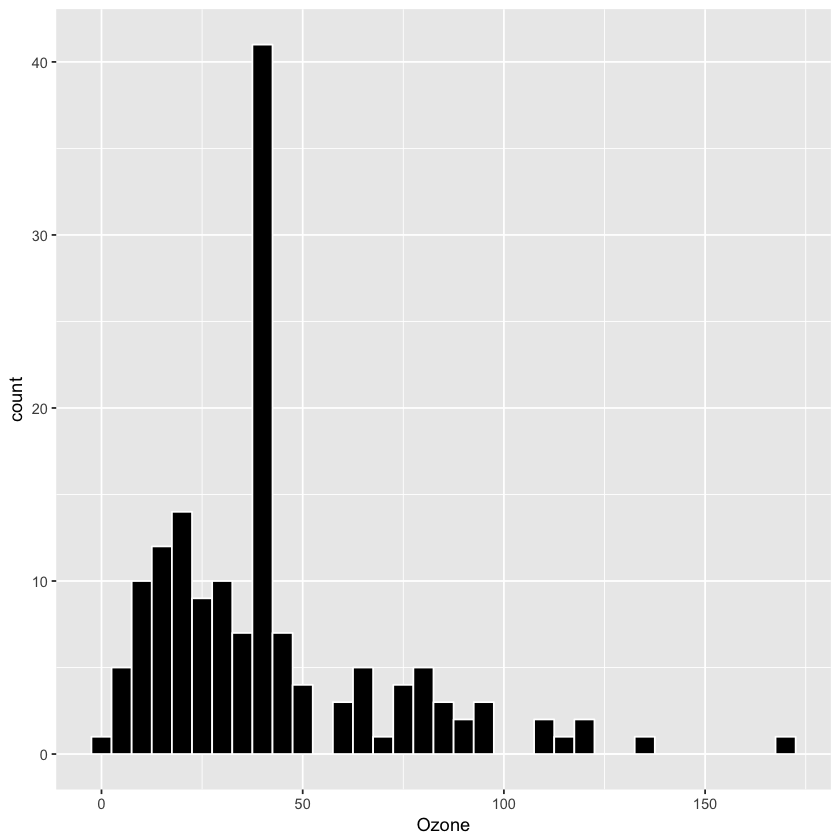

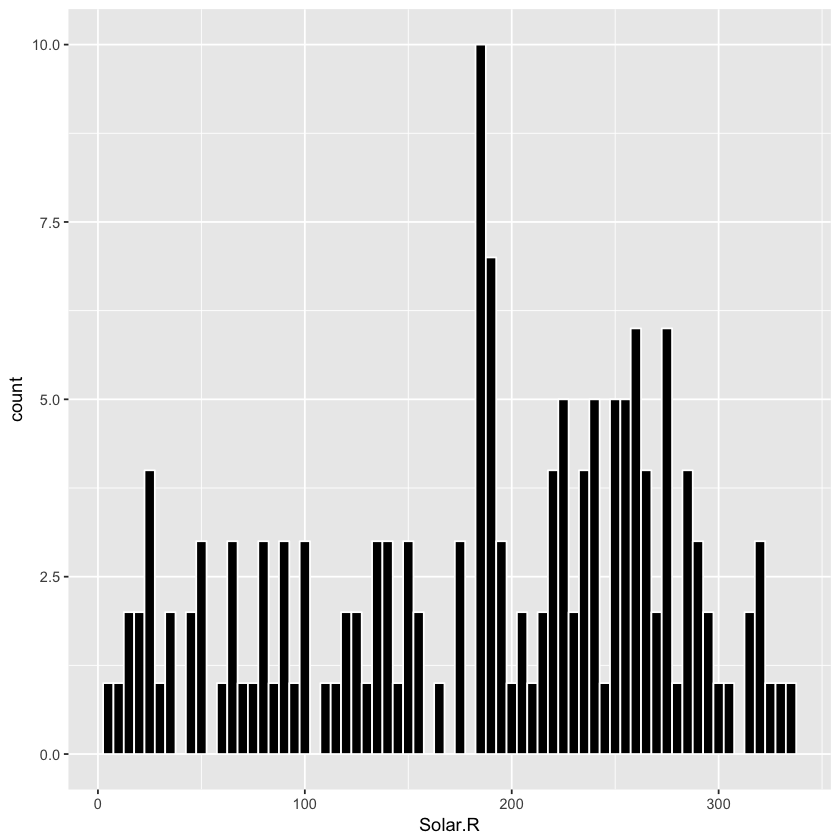

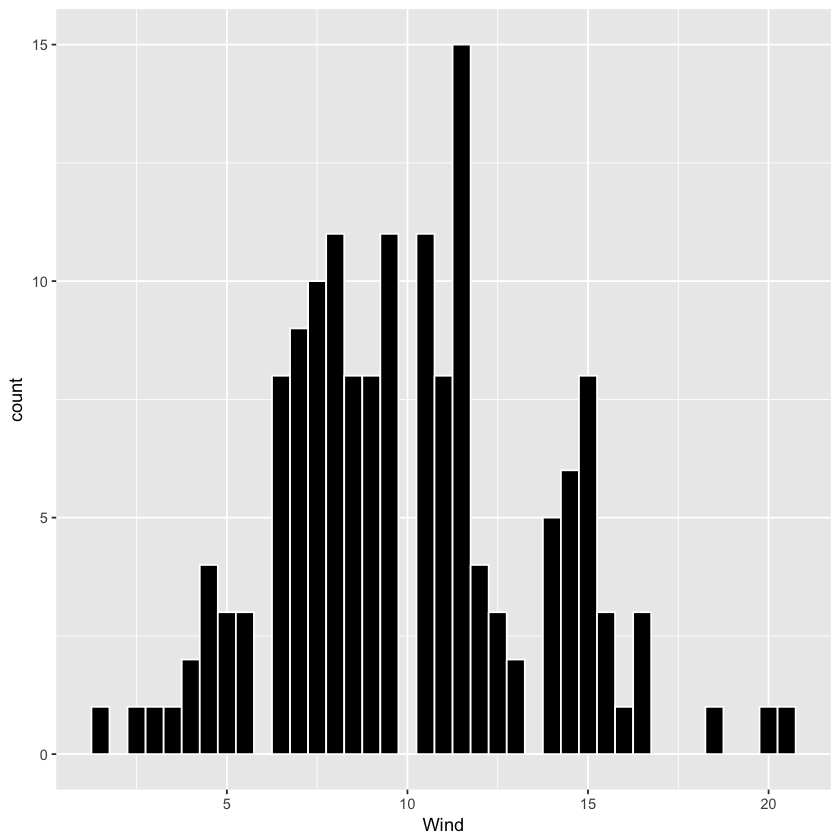

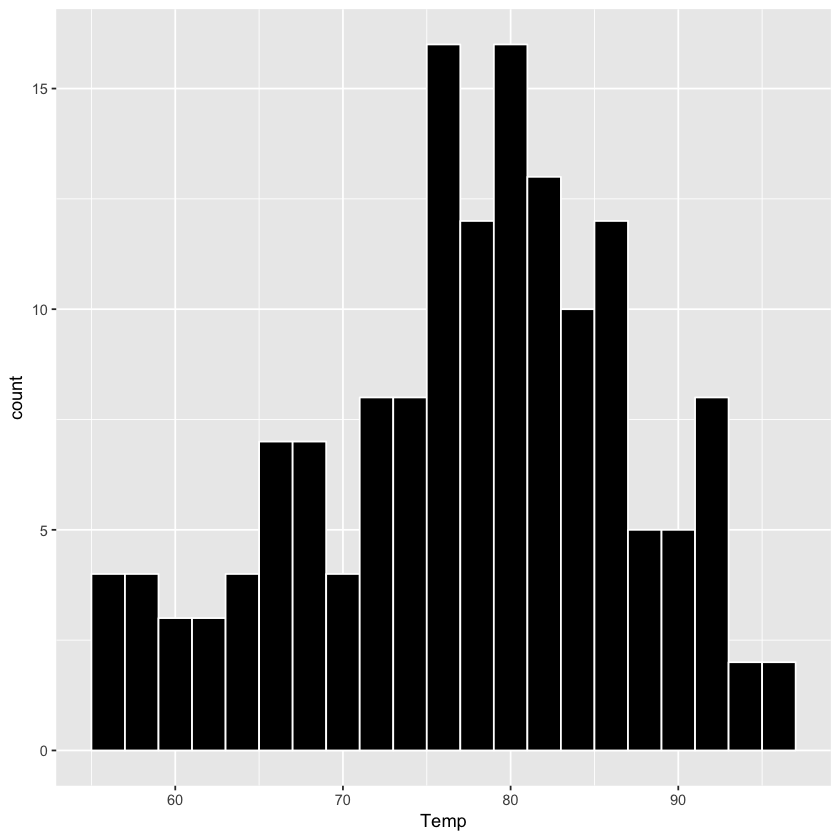

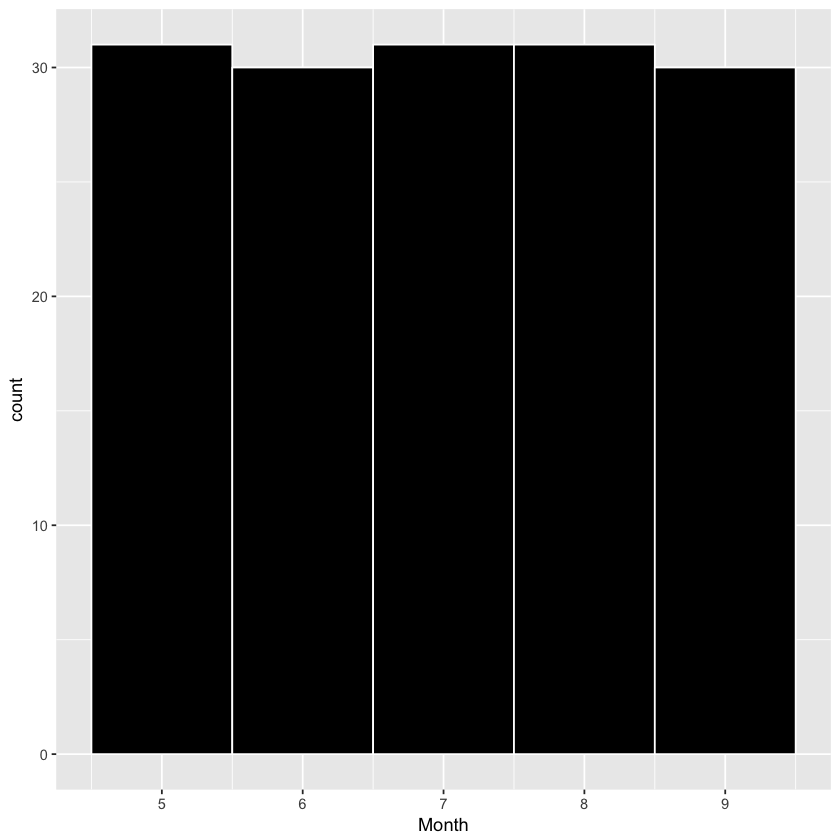

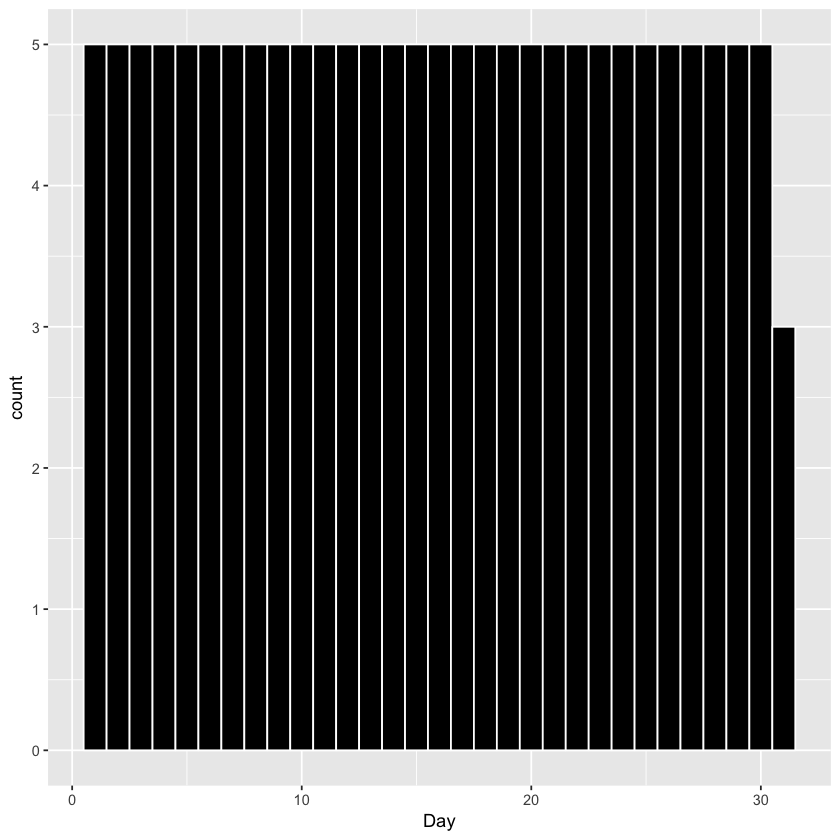

In [6]:
## histograms for each of the variables
 # use the Ozone in "air" dataframe as X variable to create a histogram
 # set the bin width to be 5, border color to be white, and bin color to be black
 ggplot(air, aes(x=Ozone)) + geom_histogram(binwidth=5, color="white", fill="black")
 # use the Solar in "air" dataframe as X variable to create a histogram 
 ggplot(air, aes(x=Solar.R)) + geom_histogram(binwidth=5, color="white", fill="black")
 # use the Wind in "air" dataframe as X variable to create a histogram 
 ggplot(air, aes(x=Wind)) + geom_histogram(binwidth=0.5, color="white", fill="black")
 # use the Temp in "air" dataframe as X variable to create a histogram 
 ggplot(air, aes(x=Temp)) + geom_histogram(binwidth=2, color="white", fill="black")
 # use the Month in "air" dataframe as X variable to create a histogram 
 ggplot(air, aes(x=Month)) + geom_histogram(binwidth=1, color="white", fill="black")
 # use the Day in "air" dataframe as X variable to create a histogram 
 ggplot(air, aes(x=Day)) + geom_histogram(binwidth=1, color="white", fill="black")

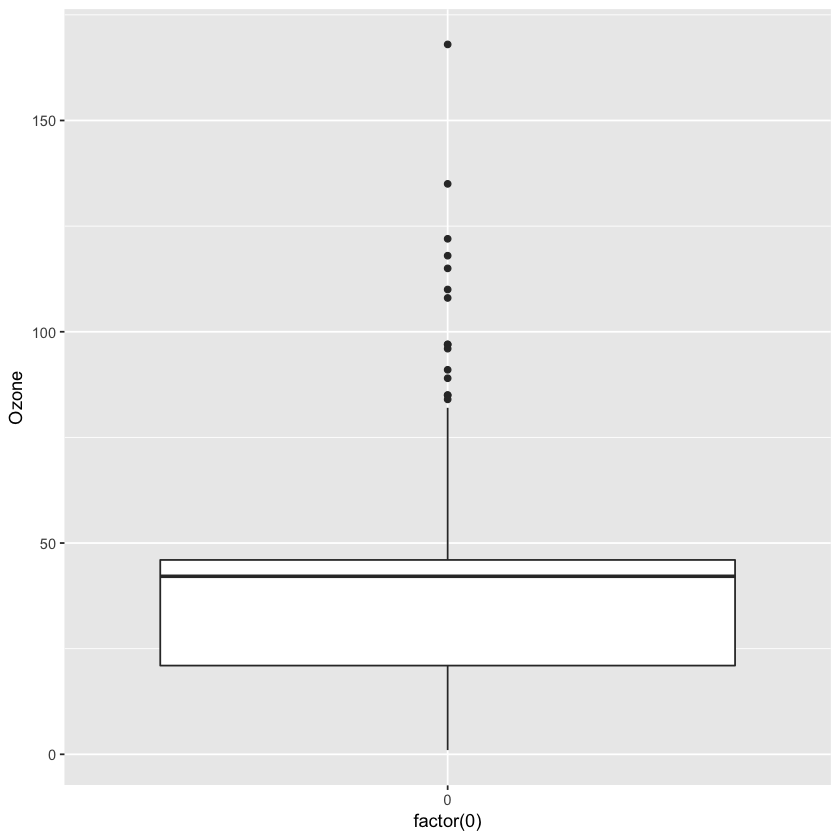

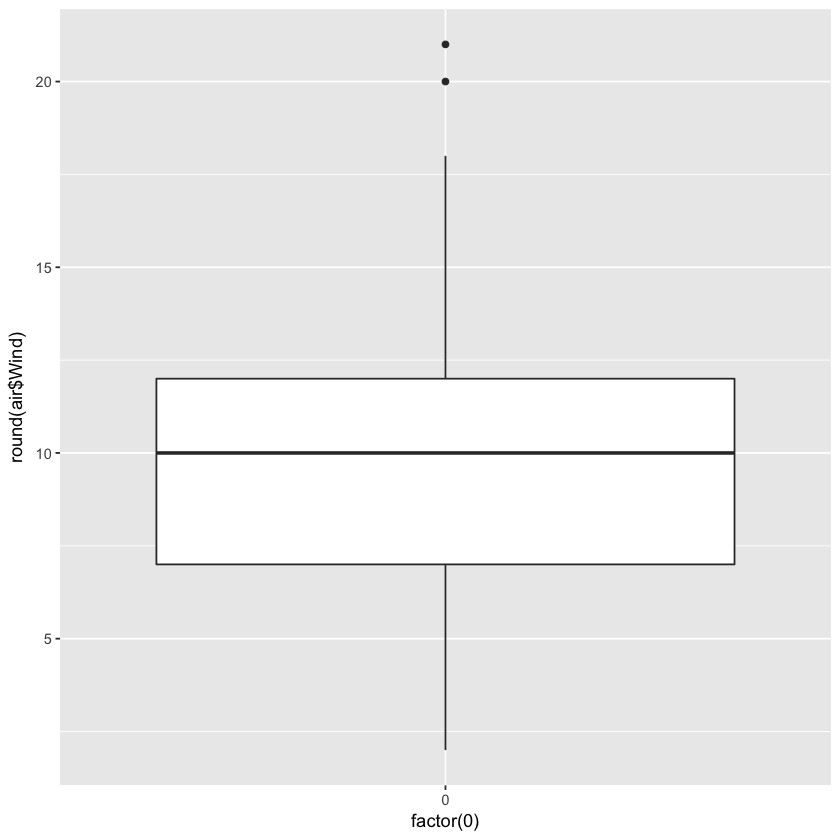

In [7]:
 # create boxplot for Ozone
 # To make a boxplot for a single variable, we need to create a fake grouping variable (x=factor(0)).
 ggplot(air, aes(x=factor(0), y=Ozone)) + geom_boxplot()
 # create boxplot for Wind
 ggplot(air, aes(x=factor(0), y=round(air$Wind))) + geom_boxplot()

Step 3: Explore how the data changes over time

First, make sure to create appropriate dates (this data was from 1973). Then create line charts for ozone, temp, wind and solar.R (one line chart for each, and then one chart with 4 lines, each having a different color). Create these visualizations using ggplot.

Note that for the chart with 4 lines, you need to think about how to effectively use the y-axis.


In [8]:
 # Paste the value in Month column, Day column, and "1973" together, and assign the result to the new created column called "Date"
 air$Date <- paste(air$Month, air$Day, 1973, sep="/")
 # convert the "Date" column to date format
 air$Date <- as.Date(air$Date, "%m/%d/%Y")
 # check the structure to see if the conversion works
 str(air)


'data.frame':	153 obs. of  7 variables:
 $ Ozone  : num  41 36 12 18 42.1 ...
 $ Solar.R: num  190 118 149 313 186 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date   : Date, format: "1973-05-01" "1973-05-02" ...


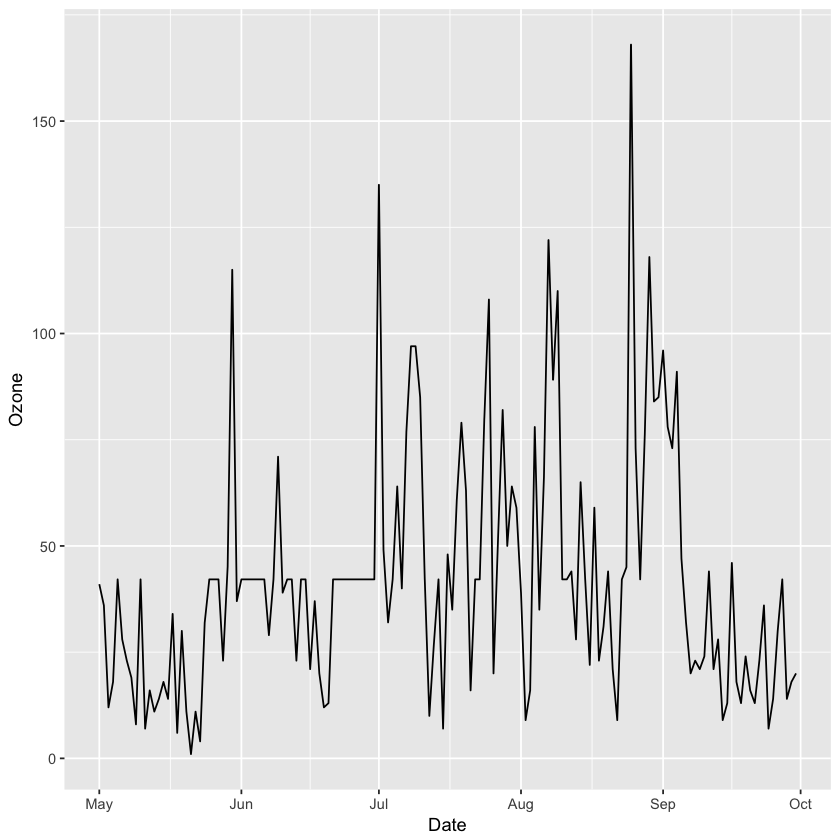

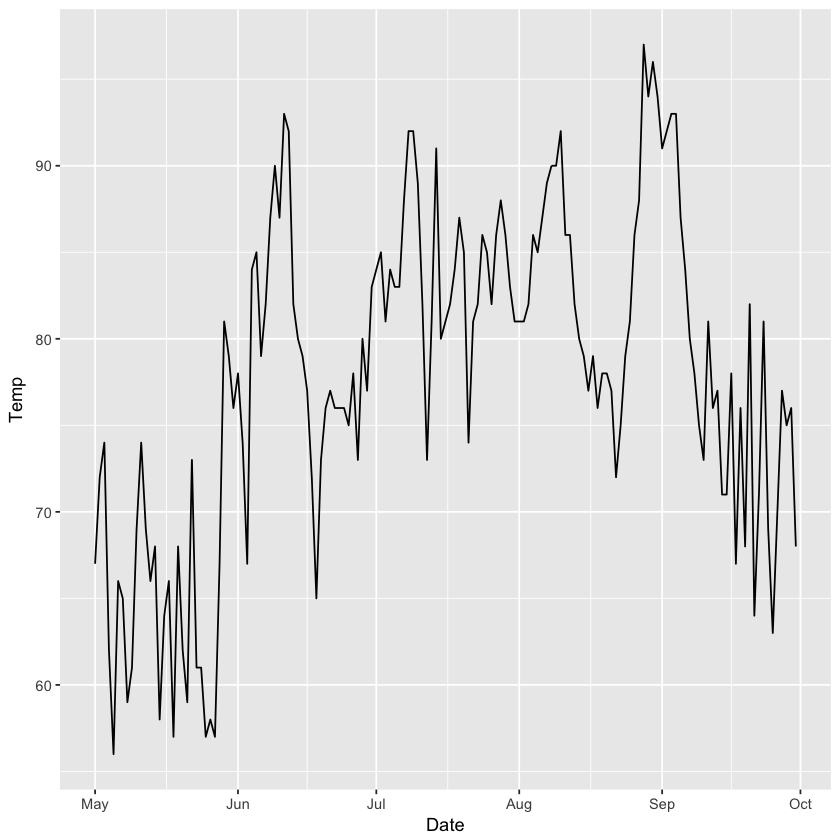

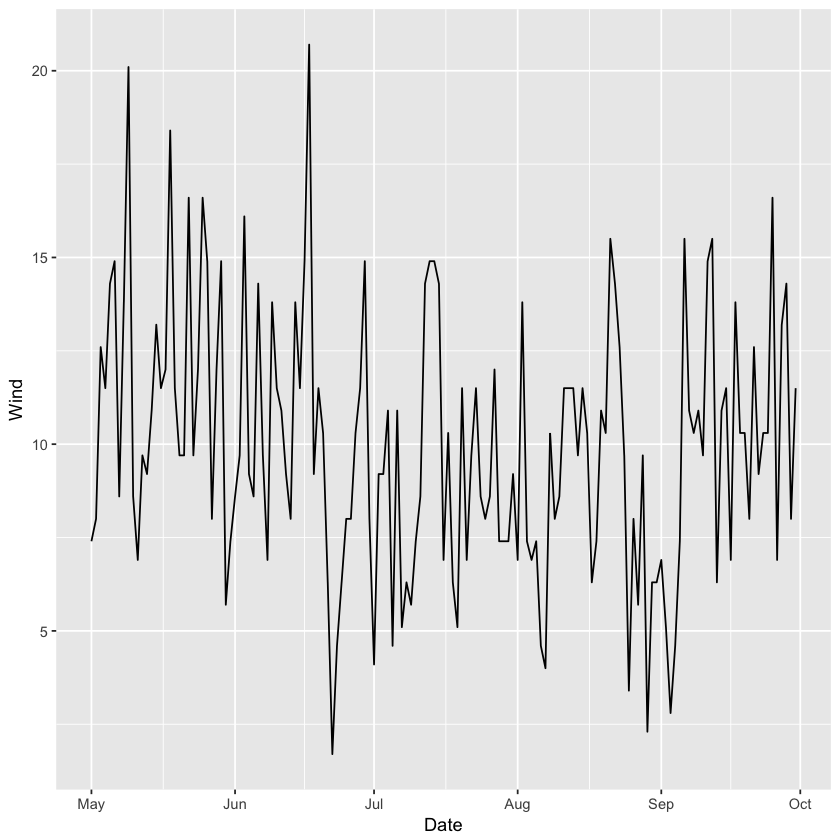

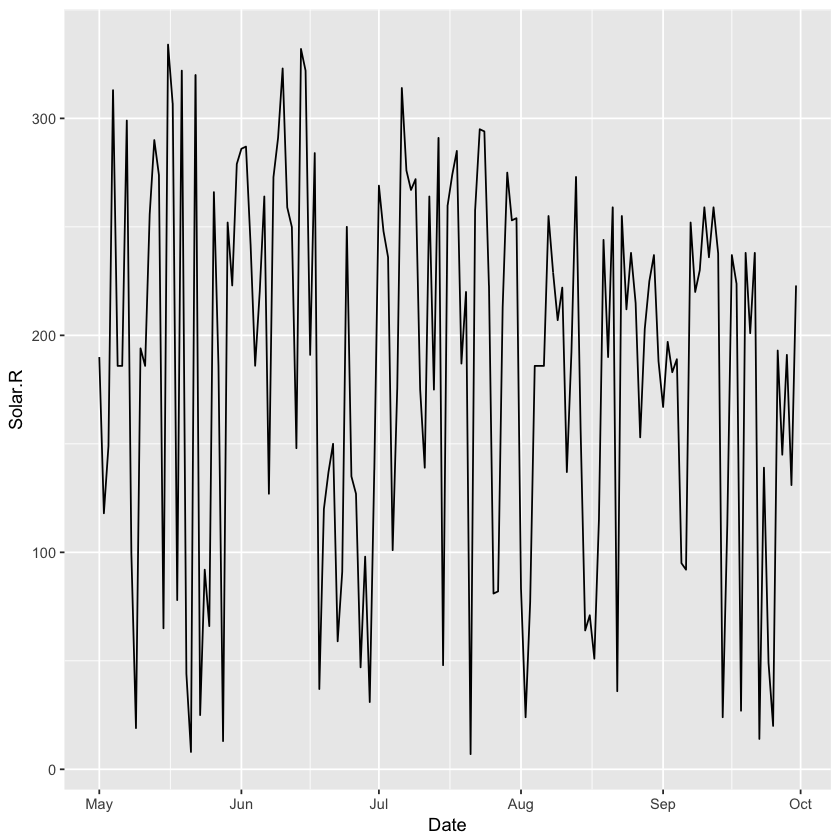

In [9]:
## create line charts for ozone, temp, wind and solar.R seperately
 # use dataframe "air" to create a line chart, considering "Date" as x variable, "Ozone" as y variable 
 ggplot(air, aes(x=Date, y=Ozone)) + geom_line()
 # use "Temp" as y variable 
 ggplot(air, aes(x=Date, y=Temp)) + geom_line()
 # use "Wind" as y variable 
 ggplot(air, aes(x=Date, y=Wind)) + geom_line()
 # use "Solar.R" as y variable 
 ggplot(air, aes(x=Date, y=Solar.R)) + geom_line()

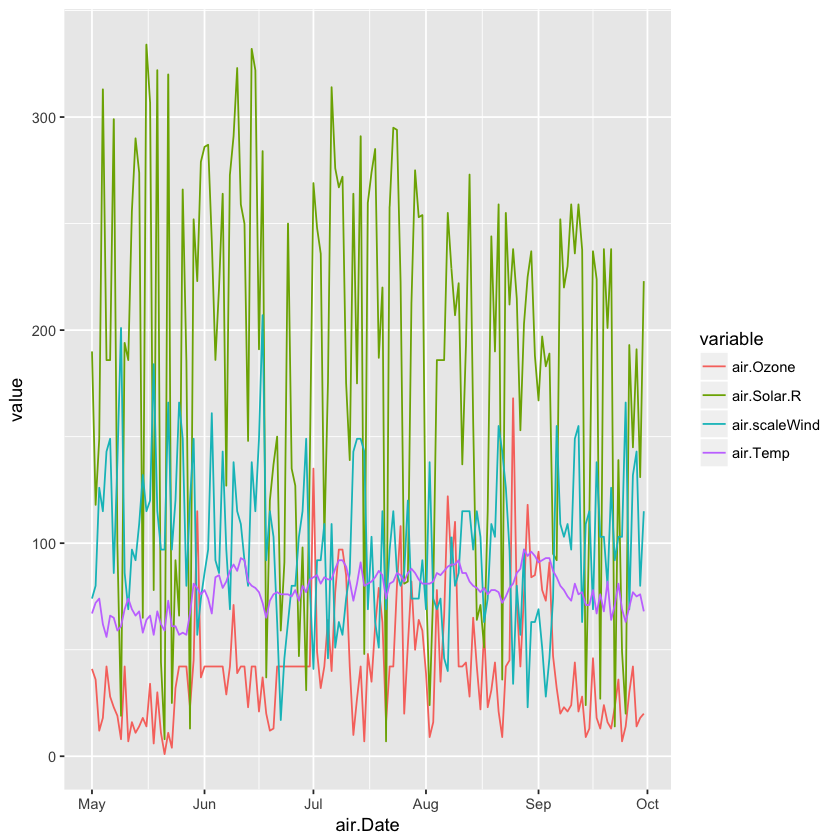

In [10]:
## create one chart with 4 lines, each having a different color
 # Multiply the Wind value by 10 to rescale the values so that they won't be too close to the x axis,
 # and then store the values into a new created column called "scaleWind"
 air$scaleWind <- air$Wind*10
 # create a new dataframe containing the four y variables and the x variable (Date).
 dfAir <- data.frame(air$Ozone, air$Solar.R, air$scaleWind, air$Temp, air$Date)

 # reframe the dataframe to stack all the y variables into a single column before visualization
 dfAir <- melt(dfAir, id=c("air.Date"))
 # create one chart with four lines, using "Date" as x variable, and the four factors as y variables
 # the colors are differentiated by the four variables
 ggplot(dfAir, aes(x=air.Date, y=value, color=variable)) + geom_line()


Step 4: Look at all the data via a Heatmap

Create a heatmap, with each day along the x-axis and ozone, temp, wind and solar.r along the y-axis, and days as rows along the y-axis.  Great the heatmap using geom_tile (this defines the ggplot geometry to be ‘tiles’ as opposed to ‘lines’ and the other geometry we have previously used).

Note that you need to figure out how to show the relative change equally across all the variables.


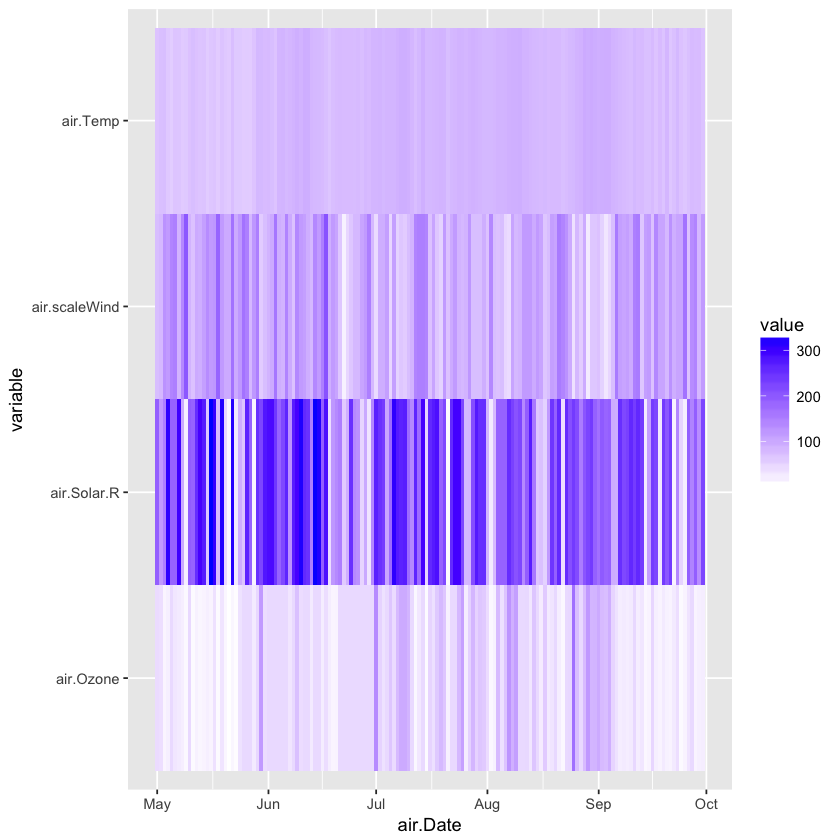

In [11]:
 # use data "dfAir" to create the chart, with each day along the x-axis and ozone, temp, wind and solar.r along the y-axis
 ggplot(dfAir, aes(x=air.Date, y=variable)) + 
   # Use geom_tile() function to demonstrate the chart as a heatmap, and fill the color according to variables' value
   geom_tile(aes(fill=value)) + 
   # define the low and high ends of the color gradient
   scale_fill_gradient(low="white", high="blue")
 

Step 5: Look at all the data via a scatter chart

Create a scatter chart (using ggplot geom_point), with the x-axis representing the wind, the y-axis representing the temperature, the size of each dot representing the ozone and the color representing the solar.R


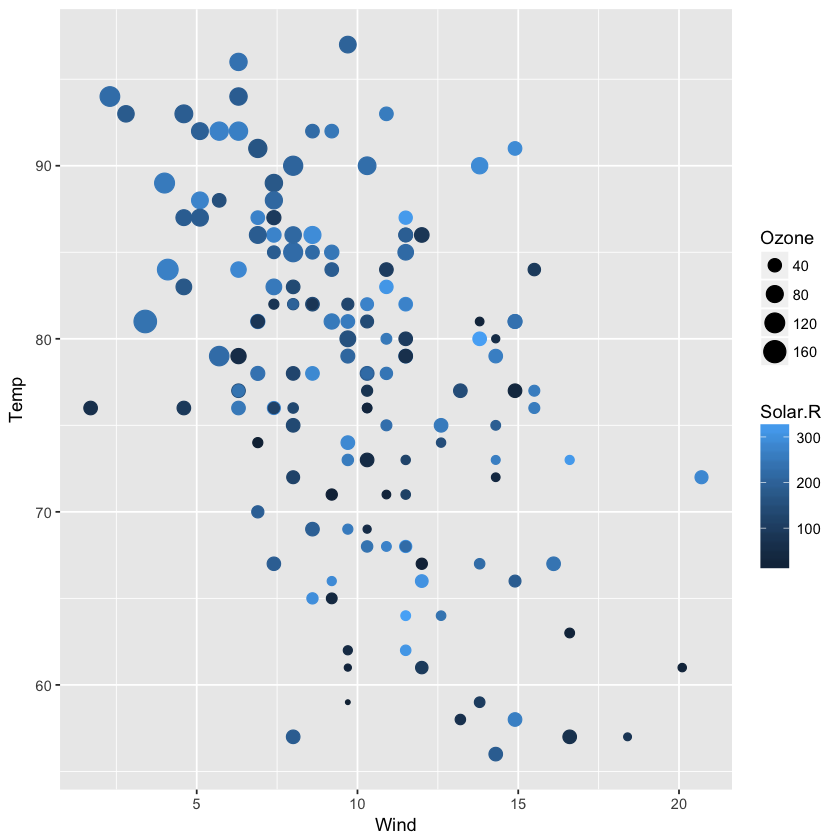

In [12]:
 # Use data "air" to create a scatter chart, with "Wind" along x-axis and "Temp" along y-axis.
 # Additionally, set the points' size according to "Ozone" value and set the shade of color according to "Solar.R" value.
 ggplot(air, aes(x=Wind, y=Temp)) + geom_point(aes(size = Ozone, color=Solar.R))

Step 6: Final Analysis
	
•	Do you see any patterns after exploring the data?  
•	What was the most useful visualization?


In [13]:
 # The scatter plot can be very useful, because it demonstrate data with more than two dimensions.